# STAT 4010/5010 Unit #6 Code: GLMs

The goal of this assignment is to analyze data using generalized linear models.

## Problem #1

In January 1986, the space shuttle Challenger exploded shortly after launch. An investigation was launched into the cause of the crash and attention focused on the rubber O-ring seals in the rocket boosters. At lower temperatures, rubber becomes more brittle and is a less effective sealant. At the time of the launch, the temperature was 31°F. Could the failure of the O-rings have been predicted? In the 23 previous shuttle missions for which data exists, some evidence of damage due to blow by and erosion was recorded on some O-rings. Each shuttle had two boosters, each with three O-rings. For each mission, we know the number of O-rings out of six showing some damage and the launch temperature. 

The 'orings' is a data frame with 23 observations on the following 2 variables.

1. temp:  Ambient temperature (Fahrenheit) at launch time
2. damage: Number of damaged 'O' rings (out of a total of 6)

#### (a) Construct a new variable called prop, which is the proportion of damaged 'O' rings. Plot prop against temperature. What do you notice about this plot?

temp,damage
53,5
57,1
58,1
63,1
66,0
67,0


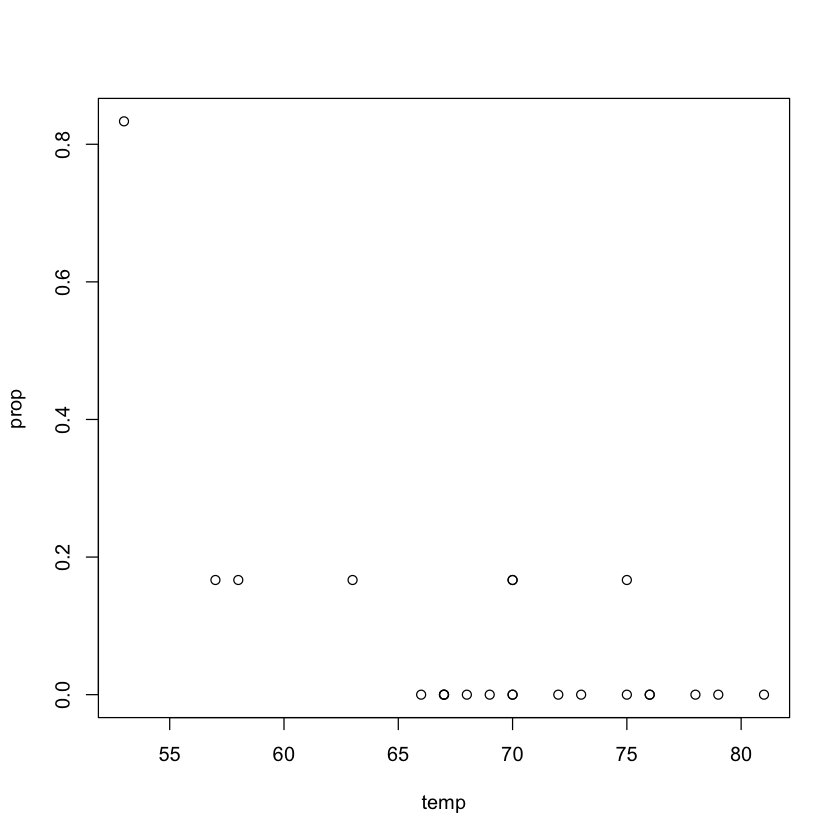

In [23]:
rm(list = ls())
library(MASS)
#library(aod) #wald.test
#library(lmtest) #lrtest (likelihood ratio test--same as anova)

orings = read.csv(url(paste0("https://raw.githubusercontent.com/bzaharatos/",
                             "-Statistical-Modeling-for-Data-Science-Applications/",
                             "master/Generalized%20Linear%20Models%20and%20Nonparametric%20Regression/",
                             "Datasets/orings.txt")), sep = "")
head(orings)
orings$prop = orings$damage/6 
with(orings, plot(temp, prop))

#### (b) Let's use the 'glm' function for fitting the logit model (logistic regression). The first argument will be the model: RESPONSE ~ PREDICTORS. For binomial response data, we need two pieces of information about the response values—y and n. Thus for binomial families, the response can be specified as a two-column matrix with the columns giving the numbers of successes and failures. You'll also need to specify the family argument, and the data argument. Other arguments should include 'data' and 'family'. Use ?glm to specify these arguments.



Call:
lm(formula = prop ~ temp, data = orings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13786 -0.10345 -0.02369  0.06601  0.48345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.21429    0.29993   4.049 0.000578 ***
temp        -0.01631    0.00429  -3.801 0.001043 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.142 on 21 degrees of freedom
Multiple R-squared:  0.4076,	Adjusted R-squared:  0.3794 
F-statistic: 14.45 on 1 and 21 DF,  p-value: 0.001043


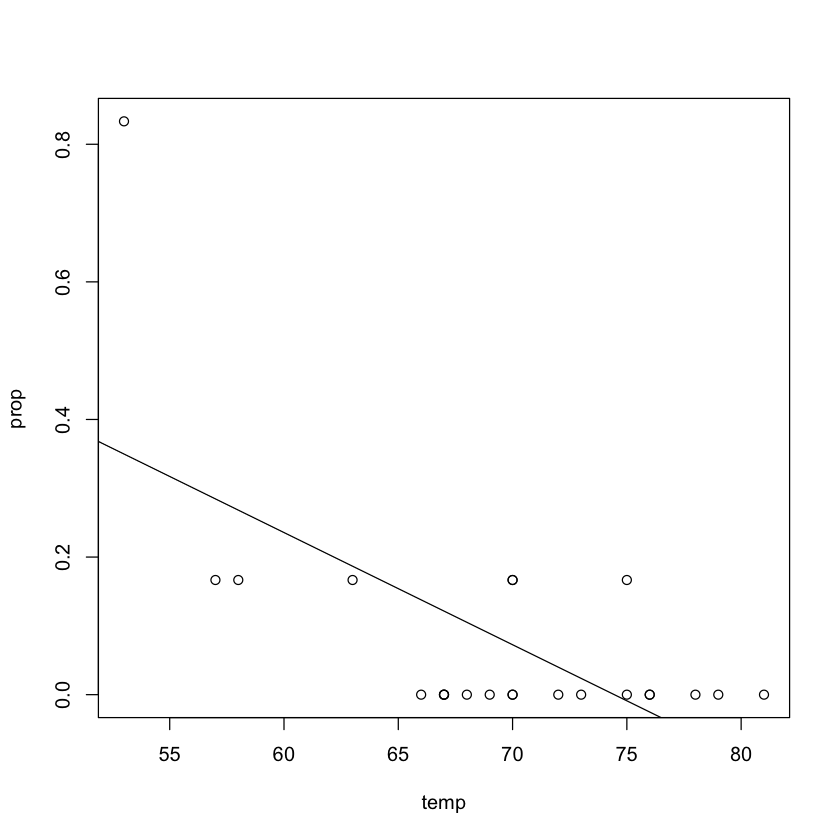

In [2]:
#first, just note that a standard linear model isn't a great idea...
lmod = lm(prop ~ temp, orings) #Use SLR...
with(orings, plot(temp, prop))
abline(lmod) #fit...bad idea
summary(lmod)


In [3]:
glmod = glm(cbind(orings$damage, 6-orings$damage) ~ temp, data = orings, 
           family = binomial)
summary(glmod)
phat = predict(glmod, type = 'response')
r = with(orings, (damage/6 - phat)/ sqrt((phat*(1-phat))/6))
summary(resid(glmod, type = 'deviance'))
summary(r)


Call:
glm(formula = cbind(orings$damage, 6 - orings$damage) ~ temp, 
    family = binomial, data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9529 -0.7345 -0.4393 -0.1661 -0.2079  1.9565 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.89727 -0.56606 -0.31188  0.07184 -0.14717  3.77106 

#### (c) Plot the data again with the logit model. You can do this easily with the ilogit function.


Attaching package: ‘faraway’

The following object is masked _by_ ‘.GlobalEnv’:

    orings



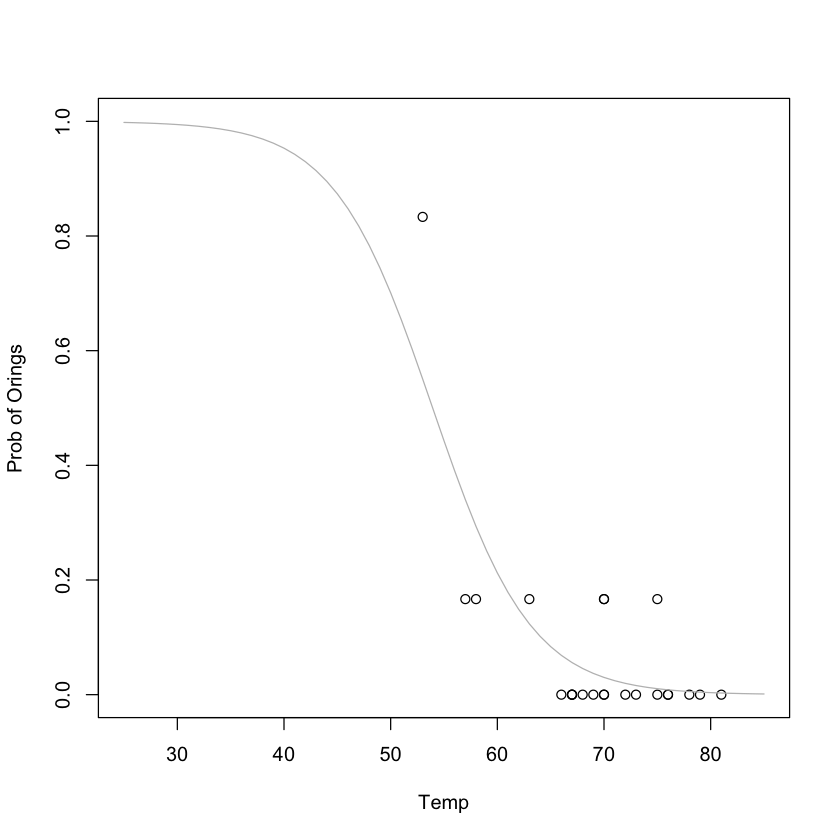

In [4]:
plot(orings$temp, orings$prop, xlim = c(25,85), ylim = c(0,1),
    xlab = 'Temp', ylab = 'Prob of Orings')
x = seq(25,85,1)
library(faraway)
lines(x, ilogit(11.66299 - 0.21623*x), col = 'grey')

#### (d) Now let's check the interpretation of $\widehat{\beta}_1$. Create a new temperature value of 45 and 46 degrees. Calculuate the odds of failure at 45 and 46 degrees. What is the ratio of these two odds? 

Note that in general, the odds ratio is equal to:

\begin{align*}
\frac{o_{x+1}}{o_{x}} &= \frac{e^{\beta_0 + \beta_1(x+1)}}{e^{\beta_0 + \beta_1x}} = \frac{e^{\beta_0 + \beta_1x + \beta_1(1)}}{e^{\beta_0 + \beta_1 x}} = \frac{e^{\beta_0 + \beta_1 x}e^{\beta_1}}{e^{\beta_0 + \beta_1x}} = e^{\beta_1}.
\end{align*}

Thus, an estimate of the odds ratio is $\displaystyle\frac{\widehat{o}_{46}}{\widehat o_{45}} = e^{\widehat\beta_1}$. 

In [6]:
newdata = data.frame(temp = 45) #chooses a value of temp
logodds1 = (coef(glmod)[1] + coef(glmod)[2]*newdata) # log odds of failure at temp = 45
odds1 = exp(logodds1) # calculate the odds...

newdata2 = data.frame(temp = 46) # add 1...
logodds2 = (coef(glmod)[1] + coef(glmod)[2]*newdata2)
odds2 = exp(logodds2)

#check interpretation
odds2/odds1
exp(coef(glmod)[2])



temp
0.8055471


temp 
0.8055471

#### (e) Compute confidence intervals for the model parameters "by hand".

In [9]:
beta0CI = c(coef(glmod)[1] - qnorm(0.975)*3.29626, 
            coef(glmod)[1] + qnorm(0.975)*3.29626)
beta1CI = c(coef(glmod)[2] - qnorm(0.975)*0.05318, 
           coef(glmod)[2] + qnorm(0.975)*0.05318)
beta0CI
beta1CI

(Intercept) (Intercept) 
   5.202439   18.123541

temp       temp 
-0.3204645 -0.1120028

#### (f) Now compute them using confint(glmod). Notice that these intervals are slightly different; they are based on the profile likelihood and do not assume asymptotic normality. They are more accurate for small sample sizes. Profile likelihood confidence intervals don’t assume normality of the estimator and appear to perform better for small samples sizes than Wald CIs (above). They are, nonetheless, still based on an asymptotic approximation – the asymptotic chi-square distribution of the log likelihood ratio test statistic. (for more info: http://www.math.umt.edu/patterson/ProfileLikelihoodCI.pdf)

In [10]:
confint(glmod)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),5.575195,18.737598
temp,-0.332657,-0.120179


#### (g) Predict the probability of faulire at Temp = 45 degrees.


In [14]:
pred = predict.glm(glmod, newdata, se = T, type = 'response')
pred$fit

1 
0.8735231

## Problem #2 

A researcher is interested in how variables, such as gre (Graduate Record Exam scores), gpa (grade point average) and prestige of the undergraduate institution (rank), effect admission into graduate school. The response variable, admit/don't admit, is a binary variable.



In [15]:
admission = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(admission)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


#### (a) Perform logistic regression treating ${\tt admit}$ as the response. Be sure to treat ${\tt rank}$ as a categorical variable.

In [16]:
admission$rank = as.factor(admission$rank)
admission.glm = glm(admit ~ gre + gpa + rank, data = admission, family = binomial)
summary(admission.glm)
confint.default(admission.glm)


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


,2.5 %,97.5 %
(Intercept),-6.2242418514,-1.755716295
gre,0.0001202298,0.004408622
gpa,0.1536836760,1.454391423
rank2,-1.2957512650,-0.055134591
rank3,-2.0169920597,-0.663415773
rank4,-2.3703986294,-0.732528724


#### (b) Construct a reduced model without the ${\tt rank}$ variable. Conduct the likelihood ratio test to decide whether the reduced model is sufficient. You can do this using ${\tt anova}$ or ${\tt lrtest}$.

In [17]:
admission.red.glm = glm(admit ~ gre + gpa, admission, family = binomial)
summary(admission.red.glm)
anova(admission.red.glm, admission.glm, test = 'Chisq') #likelihood ration


Call:
glm(formula = admit ~ gre + gpa, family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2730  -0.8988  -0.7206   1.3013   2.0620  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.949378   1.075093  -4.604 4.15e-06 ***
gre          0.002691   0.001057   2.544   0.0109 *  
gpa          0.754687   0.319586   2.361   0.0182 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 480.34  on 397  degrees of freedom
AIC: 486.34

Number of Fisher Scoring iterations: 4


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
397,480.3440,NA,NA,NA
394,458.5175,3,21.82649,7.088456e-05


Here, we are testing the null hypothesis that the reduced model is sufficient. The p-value is small. Thus, the reduced model is not sufficient. 

## Problem #3

For each 30 Galapagos islands, we have a count of the number of plant species found on each island and the number that are endemic to that island. We also have five geographic variables for each island. 

1. Species: the number of plant species found on the island
2. Endemics: the number of endemic species
3. Area: the area of the island (km$^2$)
4. Elevation: the highest elevation of the island (m)
5. Nearest: the distance from the nearest island (km)
6. Scruz: the distance from Santa Cruz island (km)
7. Adjacent: the area of the adjacent island (square km)

#### (a) Remove the Endemics variable from the dataframe, and fit a linear model with Species as the respons and all other variables as predictors. Run some diagnostics and explain why this model is not the best fit.

In [20]:
library(ggplot2)
gala = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/gala.txt", header = TRUE, sep = "\t")
gala = gala[,-2]

head(gala)
dim(gala)

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82
Daphne.Major,18,0.34,119,8.0,8.0,1.84


[1] 30  6


Call:
lm(formula = Species ~ ., data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.219 -10.225   1.830   9.557  71.090 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.337942   9.423550  -1.628    0.117    
Endemics      4.393654   0.481203   9.131 4.13e-09 ***
Area          0.013258   0.011403   1.163    0.257    
Elevation    -0.047537   0.047596  -0.999    0.328    
Nearest      -0.101460   0.500871  -0.203    0.841    
Scruz         0.008256   0.105884   0.078    0.939    
Adjacent      0.001811   0.011879   0.152    0.880    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.96 on 23 degrees of freedom
Multiple R-squared:  0.9494,	Adjusted R-squared:  0.9362 
F-statistic: 71.88 on 6 and 23 DF,  p-value: 9.674e-14


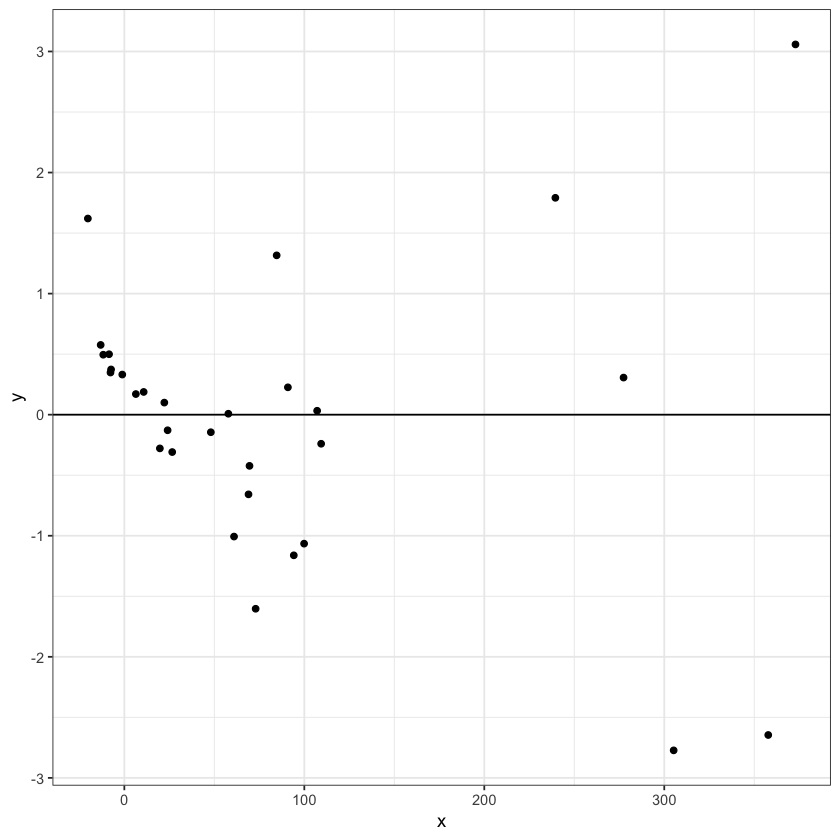

In [25]:
lmod = lm(Species ~ ., gala)
summary(lmod)
#par(mfrow = c(2,2))
#plot(lmod)
df = data.frame(x = fitted(lmod), y = stdres(lmod))
ggplot(df, aes(x = x, y = y)) + 
    geom_point() + 
    theme_bw() + 
    geom_hline(yintercept = 0)

#### (b) Recall that a square root transformation of the response might be helpful when the nonconstant variance assumption is violated. Try this transformation. 


Call:
lm(formula = sqrt(Species) ~ ., data = gala)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.77512 -0.67895 -0.07101  0.62771  2.50402 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.3705693  0.4253328   5.573 1.14e-05 ***
Endemics     0.2002788  0.0217192   9.221 3.45e-09 ***
Area        -0.0002763  0.0005147  -0.537    0.597    
Elevation   -0.0002509  0.0021483  -0.117    0.908    
Nearest      0.0198908  0.0226069   0.880    0.388    
Scruz       -0.0021423  0.0047791  -0.448    0.658    
Adjacent     0.0001255  0.0005361   0.234    0.817    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.307 on 23 degrees of freedom
Multiple R-squared:  0.9537,	Adjusted R-squared:  0.9417 
F-statistic: 79.03 on 6 and 23 DF,  p-value: 3.457e-14


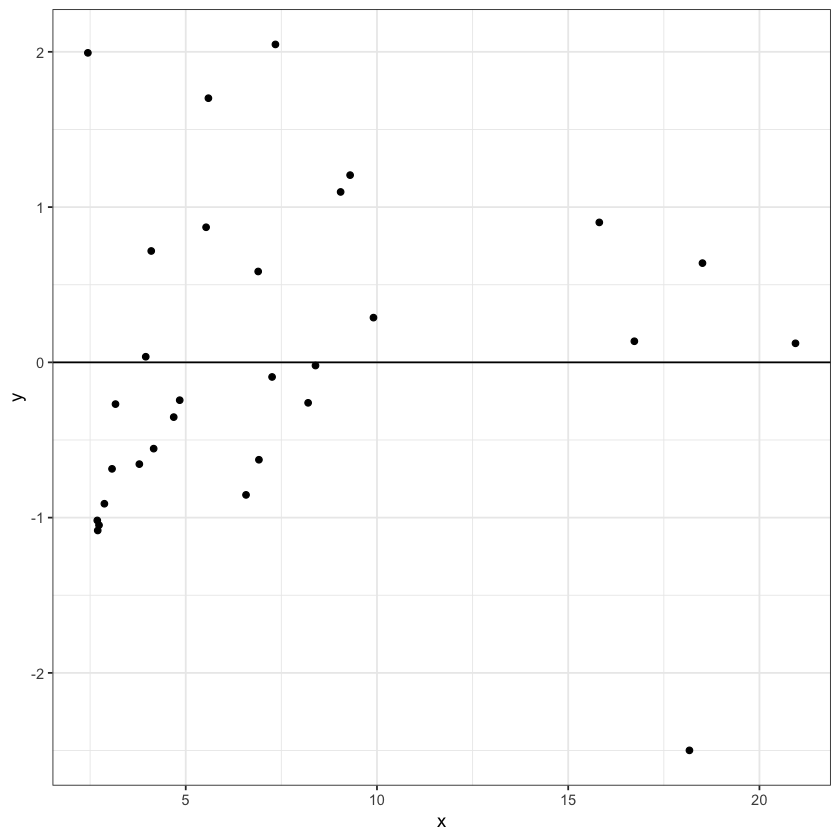

In [27]:
lmod2 = lm(sqrt(Species)~., gala)
summary(lmod2)
df = data.frame(x = fitted(lmod2), y = stdres(lmod2))
ggplot(df, aes(x = x, y = y)) + 
    geom_point() + 
    theme_bw() + 
    geom_hline(yintercept = 0)

#### (c) One issue with a transformation is that it makes interpretation less natural. Let's try a Poisson regression (with no transformation on the repsonse).


Call:
glm(formula = Species ~ ., family = poisson, data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9919  -2.9305  -0.4296   1.3254   7.4735  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.828e+00  5.958e-02  47.471  < 2e-16 ***
Endemics     3.388e-02  1.741e-03  19.459  < 2e-16 ***
Area        -1.067e-04  3.741e-05  -2.853  0.00433 ** 
Elevation    2.638e-04  1.934e-04   1.364  0.17264    
Nearest      1.048e-02  1.611e-03   6.502 7.91e-11 ***
Scruz       -6.835e-04  5.802e-04  -1.178  0.23877    
Adjacent     4.539e-05  4.800e-05   0.946  0.34437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  313.36  on 23  degrees of freedom
AIC: 488.19

Number of Fisher Scoring iterations: 5


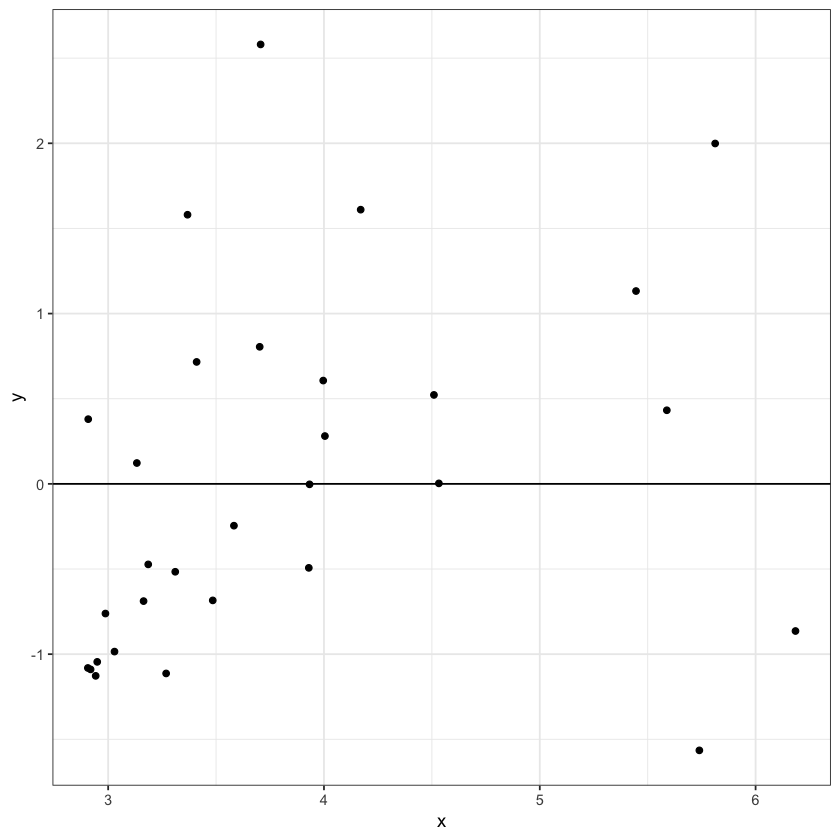

In [35]:
glmod = glm(Species ~., gala, family = poisson)
summary(glmod)

df = data.frame(x = predict(glmod, type = 'link'), y = stdres(glmod))
ggplot(df, aes(x = x, y = y)) + 
    geom_point() + 
    theme_bw() + 
    geom_hline(yintercept = 0)

#### (d) Interpret the parameter associated with Nearest. 

In [36]:
exp(8.826e-03)

[1] 1.008865

If the model is correct, a one unit increase in nearest is associated with a multiplicative increase of $exp(8.26e-03) = 1.01$ in species, on average, adjusting for other predictors. 

#### (e) Calculate the deviance for Poisson regression. Does this value show up in the summary? Also, check the goodness of fit of this model using Pearson's $\chi^2$ statistic. What do you conclude about the fit?

In [37]:
d_res = with(gala, -2*sum(Species*log(fitted(glmod)/Species)
                                      -(Species - fitted(glmod))))
d_res

chisq = with(gala, sum((Species - fitted(glmod))^2/fitted(glmod)))
chisq

pval = 1-pchisq(chisq, 24)
pval

[1] 313.3558

[1] 298.9796

[1] 0

The Chisq statistic is very large, and the p-value is small, so we would reject the null hypothesis that the model fits the data.

In [40]:
glmodred = glm(Species ~ .-Nearest, gala, family = poisson)
anova(glmodred, glmod ,test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
24,353.2056,NA,NA,NA
23,313.3558,1,39.84978,2.742654e-10


## Problem #4

Research another type of GLM (beyond binomial and Poisson), find a dataset that is reasonably modeled by that GLM, and model it. Does the model fit well?

In [64]:
glm(Species ~ ., gala, family = Gamma)
glm(Species ~ ., gala, family = gaussian)


Call:  glm(formula = Species ~ ., family = Gamma, data = gala)

Coefficients:
(Intercept)     Endemics         Area    Elevation      Nearest        Scruz  
  4.131e-02   -2.746e-04    4.243e-06   -1.999e-05   -1.593e-04   -1.074e-05  
   Adjacent  
  1.597e-06  

Degrees of Freedom: 29 Total (i.e. Null);  23 Residual
Null Deviance:	    56.27 
Residual Deviance: 23.21 	AIC: 307.7


Call:  glm(formula = Species ~ ., family = gaussian, data = gala)

Coefficients:
(Intercept)     Endemics         Area    Elevation      Nearest        Scruz  
 -15.337942     4.393654     0.013258    -0.047537    -0.101460     0.008256  
   Adjacent  
   0.001811  

Degrees of Freedom: 29 Total (i.e. Null);  23 Residual
Null Deviance:	    381100 
Residual Deviance: 19290 	AIC: 295.1

## Problem #5

The following data is on lung cancer incidence in four Danish cities 1968-1971. This data set contains counts of incident lung cancer cases and population size in four neighbouring Danish cities by age group.

Because we have an exposure (population), we should include an offset term. 

#### (a) Fit a Poisson model, with an offset for population, and then estiamte the dispersion parameter.

In [50]:
library(ISwR)
data(eba1977)
cancer = eba1977
head(cancer, 10)

city,age,pop,cases
Fredericia,40-54,3059,11
Horsens,40-54,2879,13
Kolding,40-54,3142,4
Vejle,40-54,2520,5
Fredericia,55-59,800,11
Horsens,55-59,1083,6
Kolding,55-59,1050,8
Vejle,55-59,878,7
Fredericia,60-64,710,11
Horsens,60-64,923,15


In [51]:
glmodrate = glm(cases ~ age + city + offset(log(pop)), data = cancer, 
                family = poisson(link = "log"))
summary(glmodrate)
dp = sum(resid(glmodrate, type = "pearson")^2)/glmodrate$df.res; 
dp


Call:
glm(formula = cases ~ age + city + offset(log(pop)), family = poisson(link = "log"), 
    data = cancer)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.63573  -0.67296  -0.03436   0.37258   1.85267  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.6321     0.2003 -28.125  < 2e-16 ***
age55-59      1.1010     0.2483   4.434 9.23e-06 ***
age60-64      1.5186     0.2316   6.556 5.53e-11 ***
age65-69      1.7677     0.2294   7.704 1.31e-14 ***
age70-74      1.8569     0.2353   7.891 3.00e-15 ***
age75+        1.4197     0.2503   5.672 1.41e-08 ***
cityHorsens  -0.3301     0.1815  -1.818   0.0690 .  
cityKolding  -0.3715     0.1878  -1.978   0.0479 *  
cityVejle    -0.2723     0.1879  -1.450   0.1472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 129.908  on 23  degrees of freedom
Residual deviance:  23.447  on 15  degre

[1] 1.504109

In [52]:
summary(glmodrate, dispersion = dp)


Call:
glm(formula = cases ~ age + city + offset(log(pop)), family = poisson(link = "log"), 
    data = cancer)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.63573  -0.67296  -0.03436   0.37258   1.85267  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.6321     0.2456 -22.932  < 2e-16 ***
age55-59      1.1010     0.3045   3.616 0.000299 ***
age60-64      1.5186     0.2841   5.346 9.01e-08 ***
age65-69      1.7677     0.2814   6.282 3.34e-10 ***
age70-74      1.8569     0.2886   6.434 1.24e-10 ***
age75+        1.4197     0.3069   4.625 3.74e-06 ***
cityHorsens  -0.3301     0.2226  -1.483 0.138140    
cityKolding  -0.3715     0.2303  -1.613 0.106721    
cityVejle    -0.2723     0.2304  -1.182 0.237206    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1.504109)

    Null deviance: 129.908  on 23  degrees of freedom
Residual deviance:  23.447  on 15

#### (b) Fit a reduced model without the city variable. Test to see if city is needed.

In [53]:
glmodratered = glm(cases ~ age + offset(log(pop)), data = cancer, 
                family = poisson(link = "log"))

In [54]:
anova(glmodratered, glmodrate, test = "Chisq") #city not necessary

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
18,28.30653,NA,NA,NA
15,23.44748,3,4.859049,0.182414


#### (c) Look at some plots to diagnose problems with the model.

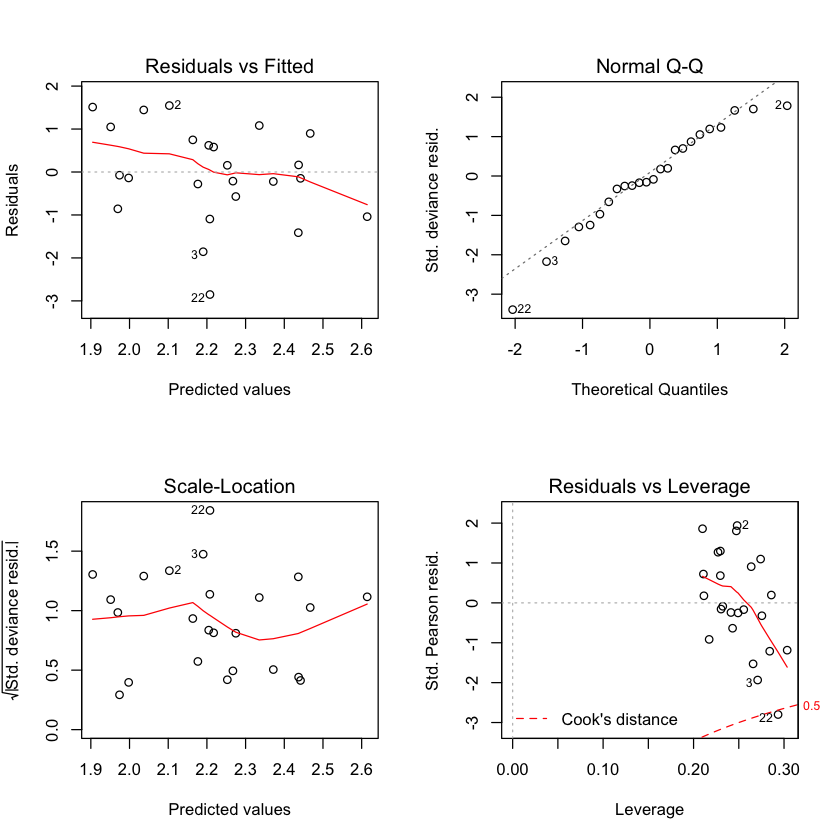

In [55]:
par(mfrow = c(2,2)); plot(glmodratered)

#### (d) Use the reduced model to predict the rate of cancer at age = "40-54" and pop = 1000 (i.e., cancer per 1000 people). Then, use the full model to predict the rate of cancer at at age = "40-54" and pop = 1000 in the city of Kolding. Do the predictions differ very much?

In [56]:
newdataRed = data.frame(age = "40-54", pop = 1000)
predRed = predict(glmodratered, newdataRed, type = "response")
predRed

newdataFull = data.frame(city = "Kolding", age = "40-54", pop = 1000)
predFull = predict(glmodrate, newdataFull, type = "link")
exp(predFull)

1 
2.844828

1 
2.469818